H3K4me3 has 18361 peaks
H3K27ac has 38923 peaks
chr_wt_H3K4me3_withH3K27ac has 16438 peaks
Mean peak length:
catergory
H3K27ac                 890.773142
H3K4me3                1184.167148
H3K4me3_withH3K27ac    1365.928093
Name: length, dtype: float64
Median peak length:
catergory
H3K27ac                 658.0
H3K4me3                1191.0
H3K4me3_withH3K27ac    1334.0
Name: length, dtype: float64


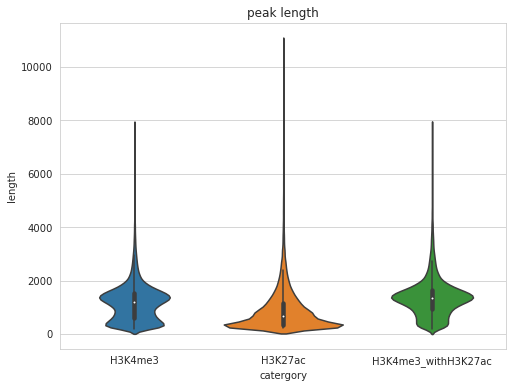

In [25]:
#!/usr/bin/env python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

colnames=("chrom", "chromStart", "chromEnd", "name", "score", "strand", "signalValue", "pValue", "qValue", "peak")
df1 = pd.read_csv ("chr_wt_H3K4me3_peaks.narrowPeak", sep = "\t", names=colnames)
df1['length']=df1['chromEnd']-df1['chromStart']
df1['catergory'] = "H3K4me3"
df1_row = df1.shape[0]
print ("H3K4me3 has " + str(df1_row) + " peaks")

df2 = pd.read_csv ("chr_wt_H3K27ac_peaks.narrowPeak", sep = "\t", names=colnames)
df2['length']=df2['chromEnd']-df2['chromStart']
df2['catergory']="H3K27ac"
df2_row = df2.shape[0]
print ("H3K27ac has " + str(df2_row) + " peaks")

colnames=("chrom", "chromStart", "chromEnd", "name", "score", "strand", "signalValue", "pValue", "qValue", "peak")
df3 = pd.read_csv ("chr_wt_H3K4me3_withH3K27ac_peaks.narrowPeak", sep = "\t", names=colnames)
df3['length']=df3['chromEnd']-df3['chromStart']
df3['catergory'] = "H3K4me3_withH3K27ac"
df3_row = df3.shape[0]
print ("chr_wt_H3K4me3_withH3K27ac has " + str(df3_row) + " peaks")

df=pd.concat ([df1,df2,df3])
means = df.groupby('catergory')['length'].mean()
medians = df.groupby('catergory')['length'].median()
print ("Mean peak length:")
print (means)
print ("Median peak length:")
print (medians)

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
violin = sns.violinplot(y="length", 
               x="catergory", 
               data=df);
violin.set_title('peak length');
plt.savefig("corrected_peak_lenght.svg", format='svg')